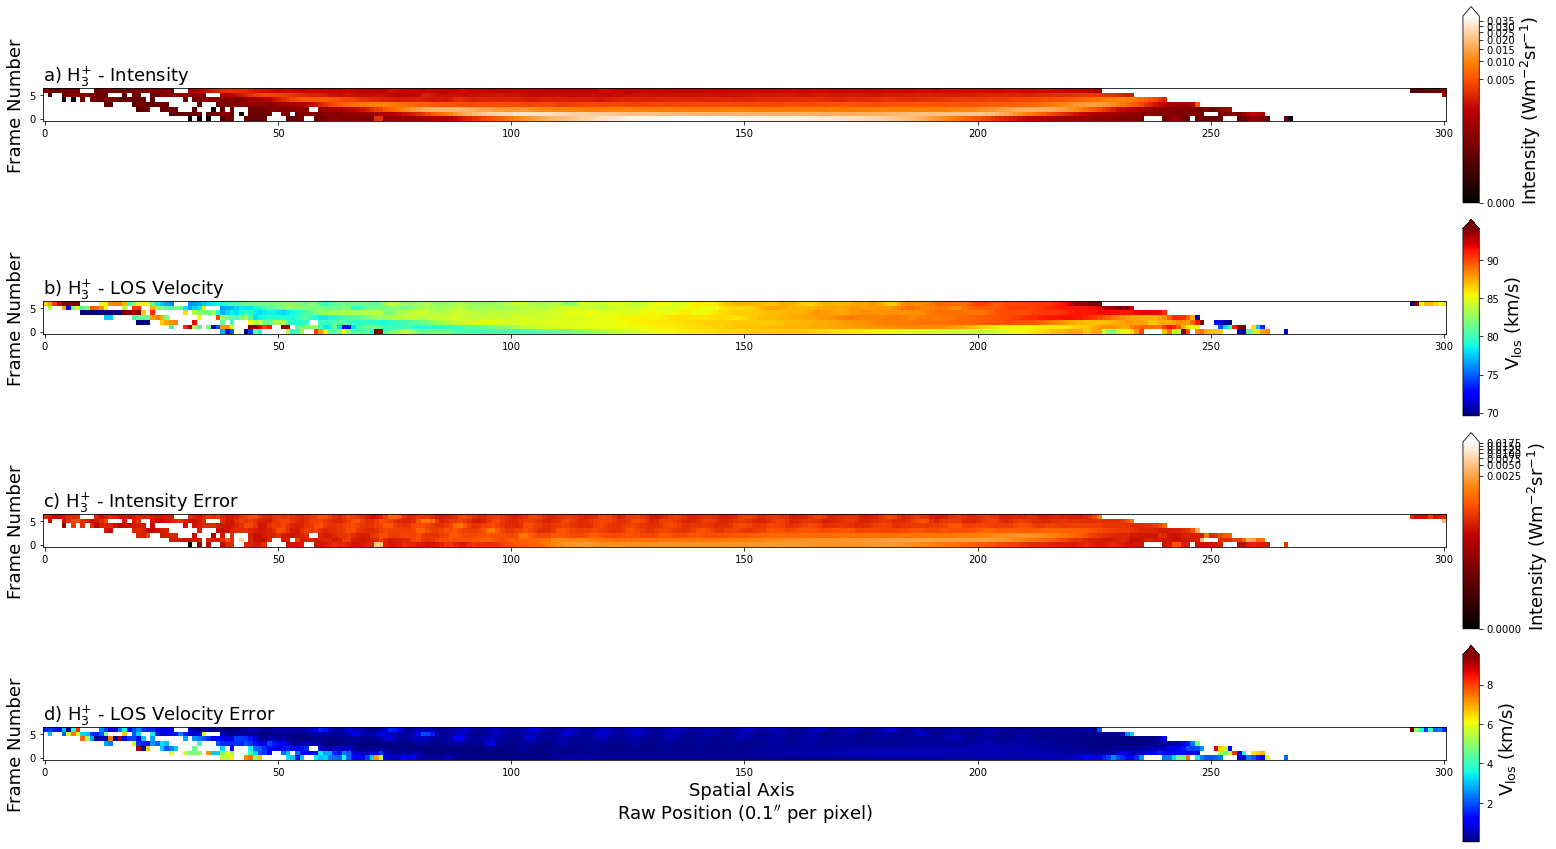

In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel

h2_int_shifted = fits.open('sh2_int_shifted.fits', ignore_missing_end=True)[0].data
h2_los_shifted = fits.open('sh2_los_shifted.fits', ignore_missing_end=True)[0].data
h2_int_shifted_error = fits.open('sh2_int_shifted_error.fits', ignore_missing_end=True)[0].data
h2_los_shifted_error = fits.open('sh2_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h2_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2), origin='lower')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(412)
plt.imshow(h2_los_shifted, cmap='jet', origin='lower')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

fig.add_subplot(413)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h2_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1), origin='lower')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('c) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(414)
plt.imshow(h2_los_shifted_error, cmap='jet', origin='lower')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('d) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

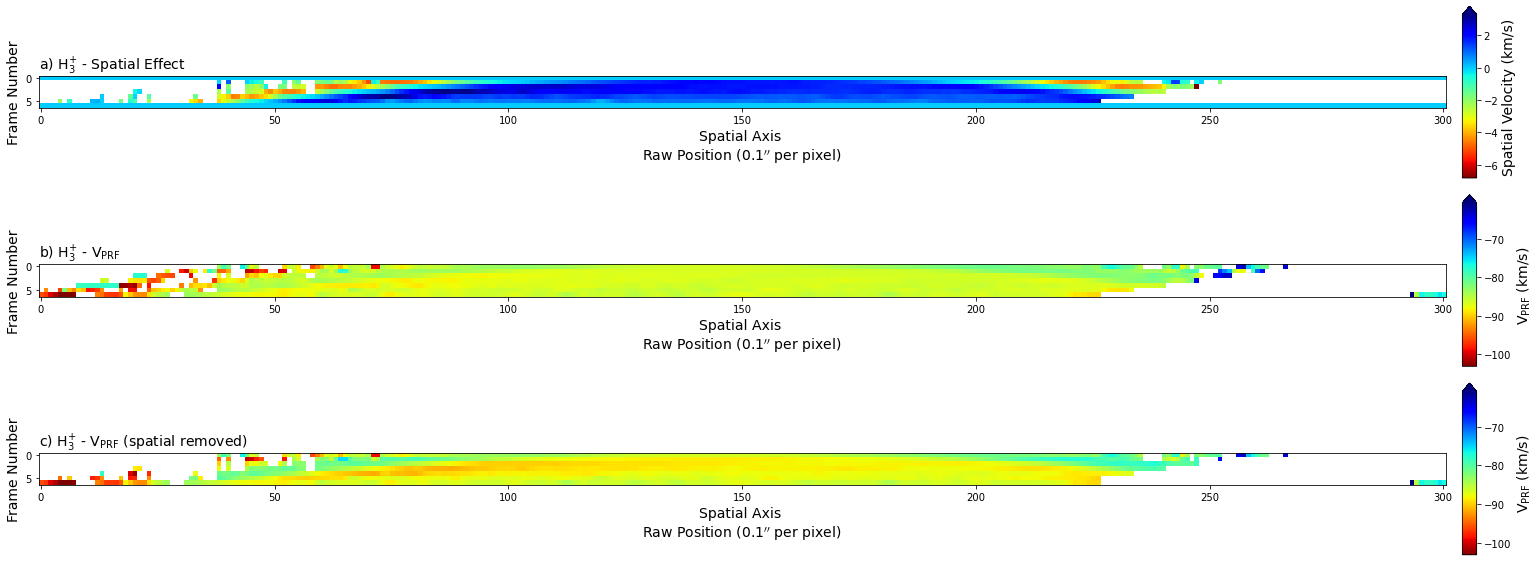

In [2]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,300,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h2_plan_vel = h2_los_shifted + 0

for i in range(np.size(h2_los_shifted, 0)):
    h2_plan_vel[i,:] = h2_los_shifted[i,:] - rot_rate


spatial_velocity = h2_int_shifted + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h2_int_shifted[j-1][i], h2_int_shifted[j][i], h2_int_shifted[j+1][i]))
#             print(j,i)
    #         plt.figure()
    #         plt.plot(y, p, 'k.', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
    #         plt.figure()
    #         plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
    #         print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.99*di

            if np.isreal(dv):
                spatial_velocity[j,i] = dv

# h2_spat_vel2 = fits.open('h2_spatial_vel2.fits', ignore_missing_end=True)[0].data
# h2_plan_vel2 = fits.open('h2_plan_vel2.fits', ignore_missing_end=True)[0].data

# spatial_velocity2 = spatial_velocity + 0
# spatial_velocity2[np.isnan(h2_spat_vel2)] = np.nan
# spatial_velocity2[spatial_velocity <= 1.5] = np.nan

# h2_plan_vel2 = h2_plan_vel + 0
# h2_plan_vel2[h2_plan_vel2 > 5] = np.nan
# h2_plan_vel2[h2_plan_vel2 < -1] = np.nan
# h2_plan_vel2[h2_los_shifted_error > 1] = np.nan
# h2_plan_vel2[np.isnan(h2_plan_vel2)] = np.nan

# spatial_velocity2[np.isnan(h2_plan_vel2)] = np.nan

h2_corrected_vel = h2_plan_vel-spatial_velocity
# h2_corrected_vel[h2_corrected_vel > 85] = 85
# h2_corrected_vel[h2_corrected_vel < 80] = 80

# h2_plan_vel[h2_plan_vel > 3] = 3
# h2_plan_vel[h2_plan_vel < -3] = -3


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h2_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h2_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

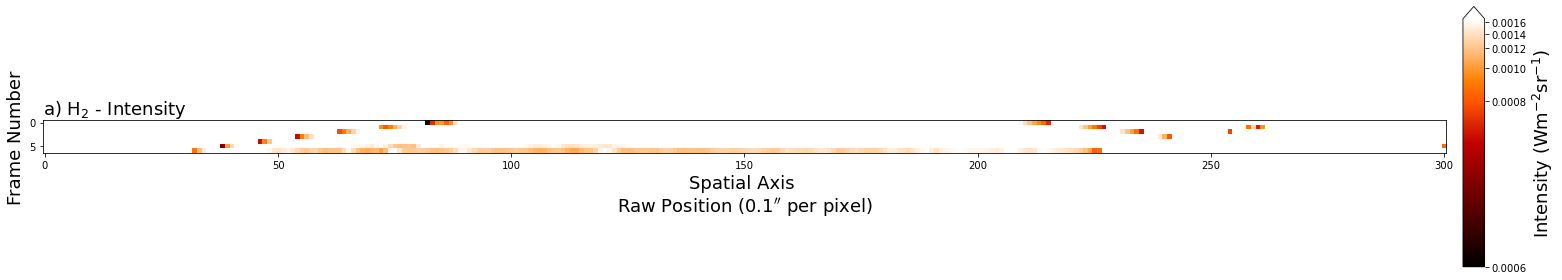

In [16]:
h2_bright2 = h2_int_shifted + 0
h2_bright2[h2_int_shifted > 0.005*1/3] = np.nan
h2_bright2[h2_int_shifted < 0.002*1/3] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(h2_bright2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_2$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

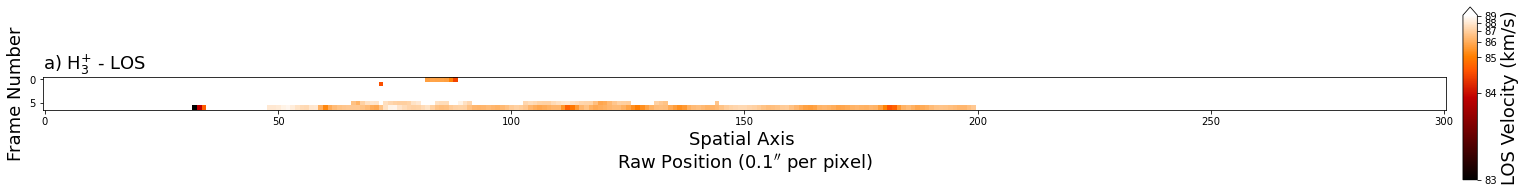

In [19]:
los_vel4 = h2_corrected_vel + 0
los_vel4[h2_los_shifted_error > 3] = np.nan
los_vel4[:][np.isnan(h2_bright2[:])] = np.nan
los_vel4[los_vel4 < 83] = np.nan
# los_vel4[los_vel4 > 88] = np.nan
# los_vel4[:,:85] = np.nan
los_vel4[:,200:] = np.nan
# los_vel4[:,:175][los_vel4[:,:175] < 82.5] = np.nan
# los_vel4[:,:120][los_vel4[:,:120] < 82.5] = np.nan
# los_vel4[:,120:180][los_vel4[:,120:180] < 82] = np.nan
# los_vel4[:,120:180][los_vel4[:,120:180] > 85] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(los_vel4, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - LOS', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

86.33611441572799
0.17234473645447024


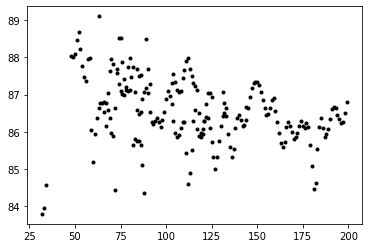

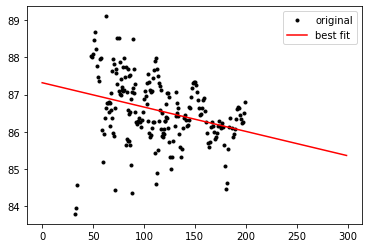

In [20]:
arr = los_vel4 + 0
for i in range(0,300):
    arr[:,i] = i
xx = arr[:][np.isfinite(los_vel4[:])]
vv = los_vel4[:][np.isfinite(los_vel4[:])]

plt.figure()
plt.plot(xx,vv, 'k.')

mod = LinearModel()

pars = mod.guess(vv, x=xx)
out = mod.fit(vv, pars, x=xx)

m = out.params['slope'].value
b = out.params['intercept'].value
sig_m = out.params['slope'].stderr
sig_b = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
xxf = np.linspace(0,299,300)
vvf = m * xxf + b
vverr = np.sqrt(sig_m**2 + sig_b**2)

plt.figure()
plt.plot(xx, vv,'.k', label = 'original')
plt.plot(xxf, vvf, 'r', label = 'best fit')
# plt.vlines(50, ymin=77, ymax=90, color='b')
# plt.vlines(95, ymin=77, ymax=90, color='b')
# plt.vlines(140, ymin=77, ymax=90, color='y')
# plt.vlines(180, ymin=77, ymax=90, color='y')
# plt.hlines(87, xmin=0, xmax=300)
plt.legend()

print(vvf[np.where(xxf==150)][0])
print(vverr)

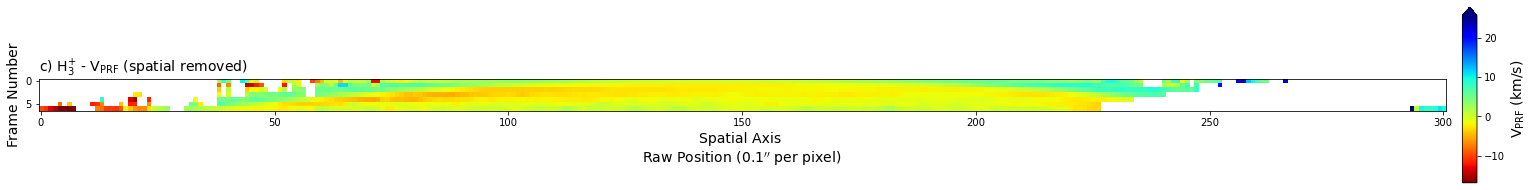

In [21]:
h2_vprf = h2_corrected_vel - vvf[np.where(xxf==150)][0]
# h2_vprf[h2_vprf > 1] = 1
# h2_vprf[h2_vprf < -3] = -3
# h2_vprf[0] = np.nan
# h2_vprf[15] = np.nan
# h2_vprf[16] = np.nan
# h2_vprf[-1] = np.nan
# h2_vprf[15:,:50] = np.nan


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h2_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [22]:
h2_los_shifted_error

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 2.99644129,        nan, ...,        nan,        nan,
               nan],
       [1.54708698, 1.74180933, 1.55627652, ..., 2.20502738, 2.36229564,
        1.60495334]])

In [23]:
vverr

0.17234473645447024

In [24]:
spat_err = fits.open('sh2_spat_err.fits', ignore_missing_end=True)[0].data
spat_err[3]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
        2.12529591,  1.51646331,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  1.12875245,         nan,
        1.64183021,         nan,         nan,         nan,  0.49114045,
        0.33340506,  0.31164822,  0.36028679,  0.50047638,  0.38093051,
        0.37192017,  0.16570916,  0.12969553,  0.10777799,  0.1209937 ,
        0.13873558,  0.15152488,         nan,         nan,  0.0815107 ,
        0.04840473,  0.04732219,  0.05729587,  0.0719368 ,  0.06585667,
        0.08209736,  0.04341073,  0.02447772,  0.02138746,  0.02

In [25]:
h2_tot_error = np.sqrt((h2_los_shifted_error)**2 + (vverr)**2 + (spat_err)**2)
h2_tot_error[2]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 5.45120538,        nan,
       2.88905221,        nan,        nan,        nan, 3.83366708,
       2.36025055, 2.25796473, 1.75589173, 1.73515668,        nan,
              nan, 1.4340062 , 1.66228081,        nan, 1.85291624,
       1.41505389, 1.66863143,        nan,        nan, 0.7577368 ,
       0.48731229, 0.47557792, 0.52663655, 0.63445658, 0.64850934,
       0.80641134, 0.39972234, 0.24977108, 0.2235225 , 0.21688807,
       0.24950187, 0.26487274, 0.33322184, 0.28700261, 0.20241

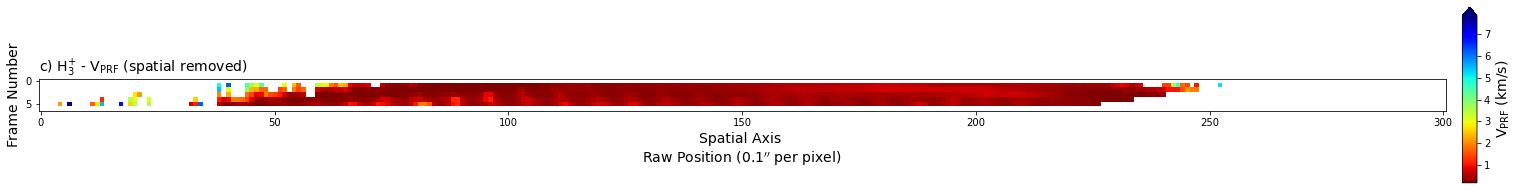

In [26]:
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h2_tot_error, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [27]:
hdu1 = fits.PrimaryHDU(h2_vprf)
hdu1.writeto('sh2_vprf.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(h2_tot_error)
hdu2.writeto('sh2_verr.fits', overwrite=True)